Classification Accuracy: 1.0
Pre-pruned Accuracy: 1.0
Post-pruned Accuracy: 0.2


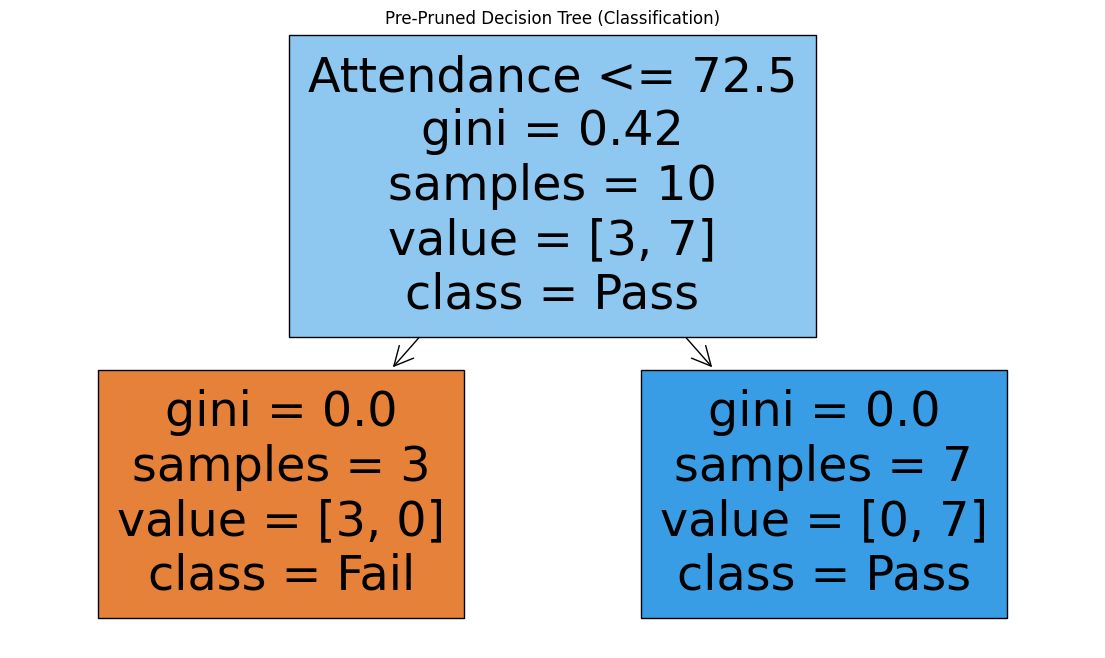


Feature Importance:
StudyHours: 0.0000
Attendance: 1.0000
PreviousScore: 0.0000

Regression Mean Squared Error: 18.0


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

df_class = pd.read_csv(r"C:\Users\cathr\Downloads\decision_tree_classification.csv")

X = df_class.drop("Pass", axis=1)
y = df_class["Pass"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

clf = DecisionTreeClassifier(criterion="gini", random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Classification Accuracy:", accuracy_score(y_test, y_pred))


pruned_clf = DecisionTreeClassifier(
    max_depth=3,
    min_samples_split=5,
    random_state=42
)
pruned_clf.fit(X_train, y_train)

y_pruned_pred = pruned_clf.predict(X_test)
print("Pre-pruned Accuracy:", accuracy_score(y_test, y_pruned_pred))


path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

alpha = ccp_alphas[-1]

post_pruned_clf = DecisionTreeClassifier(
    random_state=42,
    ccp_alpha=alpha
)
post_pruned_clf.fit(X_train, y_train)

y_post_pred = post_pruned_clf.predict(X_test)
print("Post-pruned Accuracy:", accuracy_score(y_test, y_post_pred))


plt.figure(figsize=(14,8))
plot_tree(
    pruned_clf,
    feature_names=X.columns,
    class_names=["Fail", "Pass"],
    filled=True
)
plt.title("Pre-Pruned Decision Tree (Classification)")
plt.show()


print("\nFeature Importance:")
for feature, importance in zip(X.columns, pruned_clf.feature_importances_):
    print(f"{feature}: {importance:.4f}")


df_reg = pd.read_csv(r"C:\Users\cathr\Downloads\decision_tree_regression.csv")

Xr = df_reg.drop("Price", axis=1)
yr = df_reg["Price"]

Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    Xr, yr, test_size=0.3, random_state=42
)


reg = DecisionTreeRegressor(random_state=42)
reg.fit(Xr_train, yr_train)

yr_pred = reg.predict(Xr_test)
print("\nRegression Mean Squared Error:", mean_squared_error(yr_test, yr_pred))

